<a href="https://colab.research.google.com/github/manavkdubey/fashion-mnist/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST
### This is a python notebook to detect fashion clothings from their image
### We will use classification to categorize the different images we recive and towards the end export out our model to use it to identify custom images

In [4]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import gzip
from PIL import Image
import pandas as pd

In [5]:
tf.__version__

'2.13.0'

In [6]:

def load_mnist(filename):
    with open(filename, 'rb') as f:
        # Read the header information
        magic = int.from_bytes(f.read(4), byteorder='big')
        num_images = int.from_bytes(f.read(4), byteorder='big')
        num_rows = int.from_bytes(f.read(4), byteorder='big')
        num_cols = int.from_bytes(f.read(4), byteorder='big')

        # Read the image data
        data = np.fromfile(f, dtype=np.uint8)
        data = data.reshape(num_images, num_rows, num_cols)

    return data

In [7]:
tempx= load_mnist("/content/drive/MyDrive/data/fashion/train-images-idx3-ubyte")

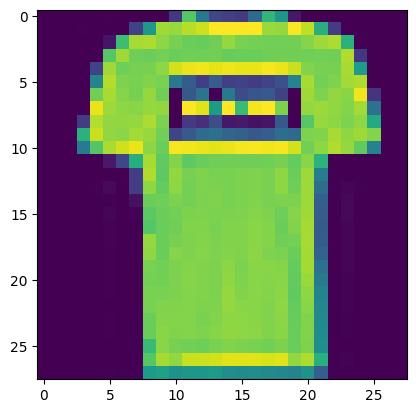

In [8]:
plt.imshow(tempx[1])

In [9]:
def load_mnist_labels(filename):
    with open(filename, 'rb') as f:
        # Read the header information
        magic = int.from_bytes(f.read(4), byteorder='big')
        num_labels = int.from_bytes(f.read(4), byteorder='big')

        # Read the label data
        label_data = np.fromfile(f, dtype=np.uint8)

    return label_data

In [10]:
labels_index=load_mnist_labels("/content/drive/MyDrive/data/fashion/train-labels-idx1-ubyte")
df=pd.read_csv("/content/drive/MyDrive/data/fashion/fashion-mnist_train.csv")

In [11]:
unique_labels_list = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
unique_labels=np.array(unique_labels_list)
labels_index

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
labels=[]
for label in labels_index:
  labels.append(unique_labels[labels_index])

In [ ]:
np.argmax(labels[1])

In [41]:
tempx_test=load_mnist("/content/drive/MyDrive/data/fashion/t10k-images-idx3-ubyte")

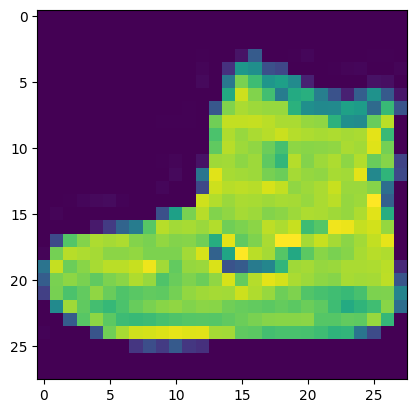

In [42]:
plt.imshow(tempx[0])

In [43]:
labels_test=load_mnist_labels("/content/drive/MyDrive/data/fashion/t10k-labels-idx1-ubyte")
labels_test[0]


9

In [70]:
x_color = np.zeros((tempx.shape[0], tempx.shape[1], tempx.shape[2], 1), dtype=np.uint8)
x_color[..., 0] = tempx
x= x_color
x.shape


9


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [66]:
boolean_labels=[label== unique_labels for label in labels]
y=boolean_labels
y[0]

<ipython-input-66-8141f1e1cd23>:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  boolean_labels=[label== unique_labels for label in labels]


False

In [48]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)

len(x_train),len(x_val),len(y_train),len(y_val)

(48000, 12000, 48000, 12000)

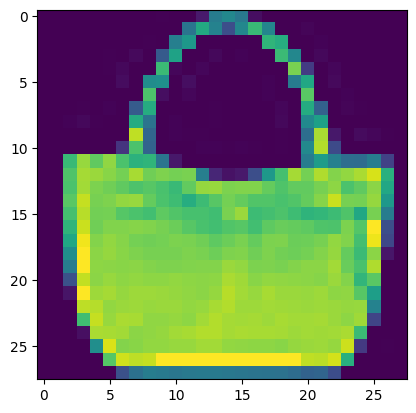

In [49]:
plt.imshow(x[100])

In [50]:

def process_image(image):
  return image

In [51]:
def get_image_label(image,label):
  return image,label



In [65]:
y_train[0]

False

In [54]:
BATCH_SIZE=32

def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  if test_data:
    print("Creating test data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch= data.batch(BATCH_SIZE)
    return data_batch
  elif valid_data:
    print("Creating validation data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                             tf.constant(y)))
    data_batch= data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else:
    print("Creating training data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                             tf.constant(y)))
    data=data.shuffle(buffer_size=len(x))
    data_batch= data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

In [55]:
train_data=create_data_batches(x_train,y_train)
val_data=create_data_batches(x_val,y_val,valid_data=True)


Creating training data batches...
Creating validation data batches...


In [62]:
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 28, 28, 1), dtype=tf.uint8, name=None),
  TensorSpec(shape=(None,), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 28, 28, 1), dtype=tf.uint8, name=None),
  TensorSpec(shape=(None,), dtype=tf.bool, name=None)))

In [56]:
import matplotlib.pyplot as plt
def show_25_image(images,labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_labels[labels[i].argmax()])
    plt.axis("off")

In [57]:
train_images,train_labels =next(train_data.as_numpy_iterator())
len(train_images),len(train_labels)


(32, 32)

In [61]:
train_labels[0]

False

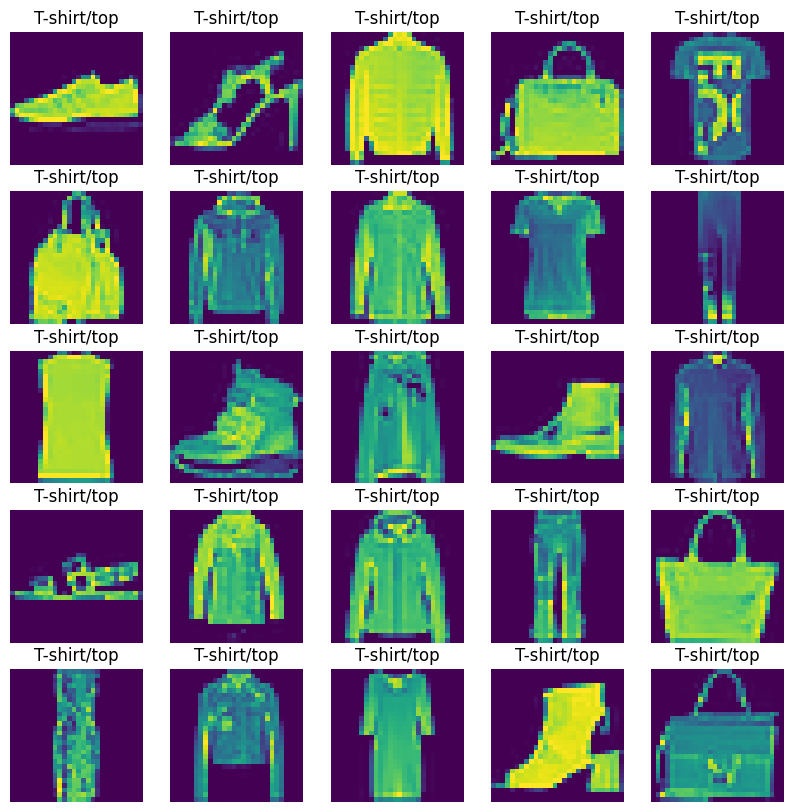

In [59]:
show_25_image(train_images,train_labels)

IndexError: ignored

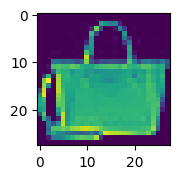

In [293]:
val_images,val_labels =next(val_data.as_numpy_iterator())
len(val_images),len(val_labels)
show_25_image(val_images,val_labels)

In [207]:
INPUT_SHAPE = [None,28,28,3]

OUTPUT_SHAPE=1

MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [208]:
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print("Building model with: ",MODEL_URL)

  model=tf.keras.Sequential([
      tf.keras.layers.Resizing(224, 224, interpolation='bilinear', input_shape=input_shape[1:]),
      hub.KerasLayer(MODEL_URL),
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation="softmax")
  ])
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )
  model.build(INPUT_SHAPE)
  return model

In [209]:
model=create_model()
model.summary()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_4 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 keras_layer_28 (KerasLayer  (None, 1001)              5432713   
 )                                                               
                                                                 
 dense_43 (Dense)            (None, 1)                 1002      
                                                                 
Total params: 5433715 (20.73 MB)
Trainable params: 1002 (3.91 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [210]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [211]:
import datetime
import os
def create_tensorboard_callback():
  logdir= os.path.join("/content/drive/MyDrive/colab/logs",
                       datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [212]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                patience=3)

## Training our model

In [218]:
NUM_EPOCHS= 1 #@param{type:"slider",min:1,max:100,step:10}

In [219]:
def train_model():
  model = create_model()

  tensorboard=create_tensorboard_callback()

  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])
  return model

In [220]:
model = train_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
1500/1500 [==============================] - 95s 60ms/step - loss: 0.0000e+00 - accuracy: 0.0996 - val_loss: 0.0000e+00 - val_accuracy: 0.1016
